<a href="https://colab.research.google.com/github/jacksonguedes/PDS/blob/main/FFT_M%C3%A9todo_ButterFly02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt

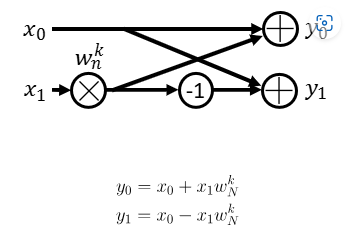

image.png

In [32]:
def fft(x):
    N = len(x)
    if N == 1:
        return x  # Retorna x no caso base
    else:
        x_0 = fft(x[::2])  # Índices Pares
        x_1 = fft(x[1::2])  # Índices Ímpares
        k = np.arange(N // 2)
        twiddle = np.exp(-2j * np.pi * k / N)  # Twiddle Factor

        y_0 = x_0 + twiddle * x_1
        y_1 = x_0 - twiddle * x_1

        return np.concatenate([y_0, y_1])

Sinal simples  
N = 4

In [33]:
x = [0, 1, 2, 3]
X = fft(x)
print(X)

[ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]


Sinal complexo

In [34]:
# Gerar sinal de cosseno simples
sample_rate = 1e3  # Taxa de amostragem
N = 1024 # Número de amostras
t = np.arange(N) / sample_rate  # Vetor de tempo
f_signal = 400  # Frequência do sinal

In [35]:
# Sinal de cosseno puro
r = np.cos(2 * np.pi * f_signal * t)

In [36]:
# Executar FFT
X = fft(r)

In [37]:
# Considerar apenas a parte positiva do espectro
X_positive = X[:N // 2]
X_amp = np.abs(X_positive) / N
X_fase = np.degrees(np.angle(X_positive))


# Vetor de frequências
f = np.linspace(0, sample_rate / 2, N // 2)

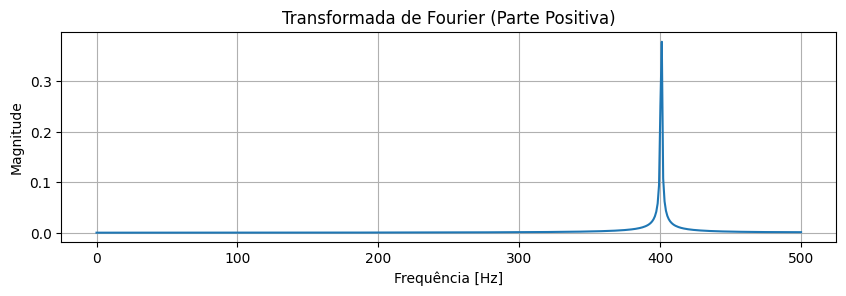

In [38]:
# Plotar magnitude
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(f, X_amp)
plt.title('Transformada de Fourier (Parte Positiva)')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

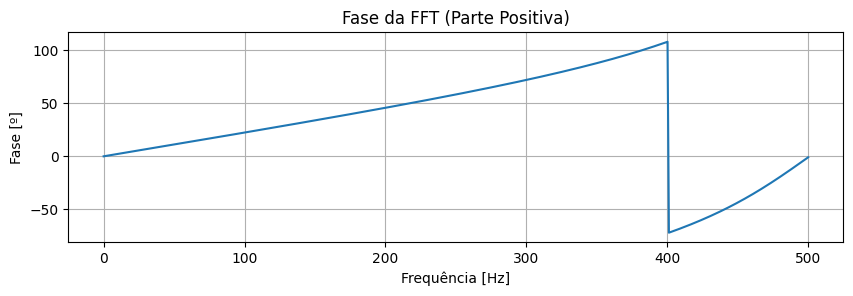

In [39]:
# Plotar fase
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(f, X_fase)
plt.title('Fase da FFT (Parte Positiva)')
plt.xlabel('Frequência [Hz]')  # Alterado para kHz
plt.ylabel('Fase [º]')
plt.grid()
plt.show()